In [1]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import ceil
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import seaborn as sns

In [3]:
# Definindo o ativo, data de início e data de fim para a coleta de dados
# Intervalo de tempo de 30 anos desde o último registro
ativo = 'PETR4.SA' # Símbolo da Petrobras na B3 (Bolsa de Valores do Brasil)
intervalo_tempo = '30y'  # Definindo um intervalo de tempo

In [4]:
# Baixando dados históricos do ativo
base_dados = yf.download(tickers=ativo, period=intervalo_tempo)

[*********************100%%**********************]  1 of 1 completed


In [5]:
dados_do_ativo = base_dados.copy()

In [6]:
dados_do_ativo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.506321,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.422993,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.408634,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.403763,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.410173,20912640000


In [7]:
dados_do_ativo.shape

(5992, 6)

In [8]:
# Verifica a contagem de valores ausentes em cada coluna
dados_do_ativo.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
dados_do_ativo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5992 entries, 2000-01-03 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5992 non-null   float64
 1   High       5992 non-null   float64
 2   Low        5992 non-null   float64
 3   Close      5992 non-null   float64
 4   Adj Close  5992 non-null   float64
 5   Volume     5992 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 327.7 KB


In [10]:
dados_do_ativo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5.992000e+03
mean,19.358939,19.646834,19.050217,19.339488,7.135342,5.415402e+08
std,9.624768,9.776032,9.456552,9.596523,5.534742,3.863563e+09
min,0.000000,0.000000,0.000000,4.200000,1.121729,0.000000e+00
25%,10.567500,10.739688,10.406875,10.585937,3.080058,2.167352e+07
50%,19.785000,20.080000,19.459999,19.785001,6.214920,3.502090e+07
75%,26.480000,26.879999,26.082500,26.500000,9.092870,5.602920e+07
max,67.500000,67.500000,51.950001,52.509998,38.520000,7.356416e+10


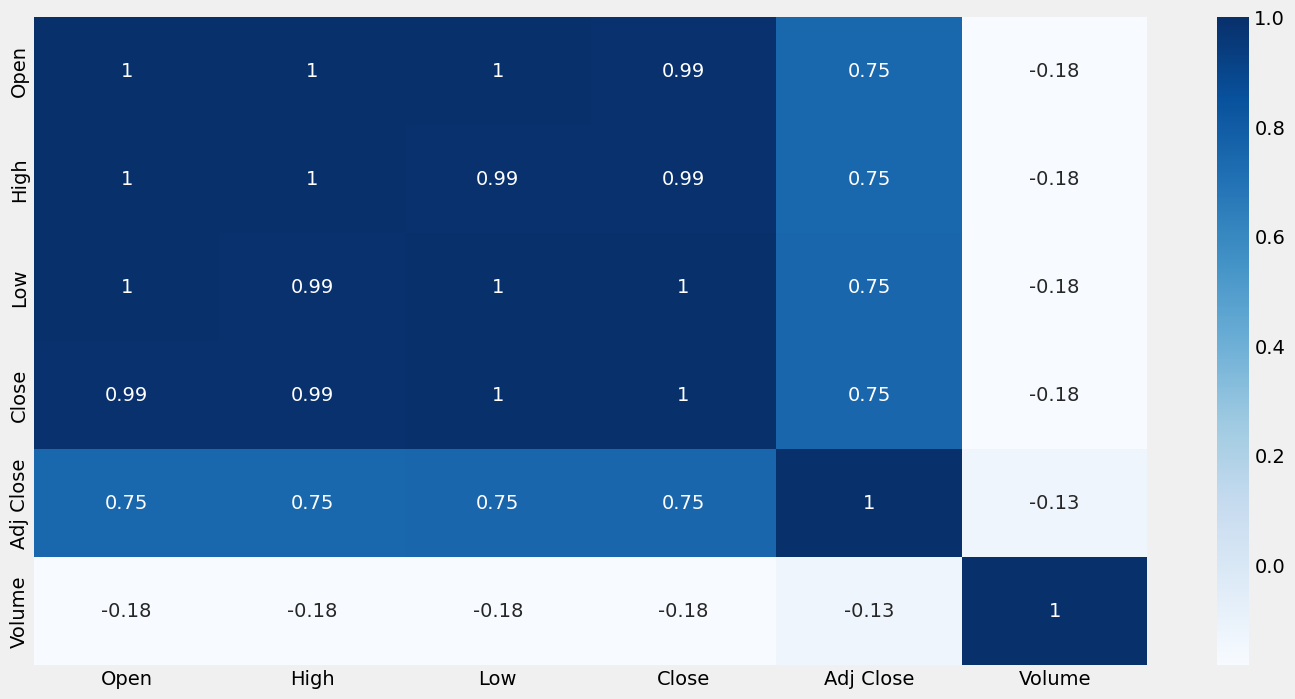

In [11]:
dados_do_ativo.corr()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))

sns.heatmap(dados_do_ativo.corr(), cmap='Blues', annot=True)
plt.show()

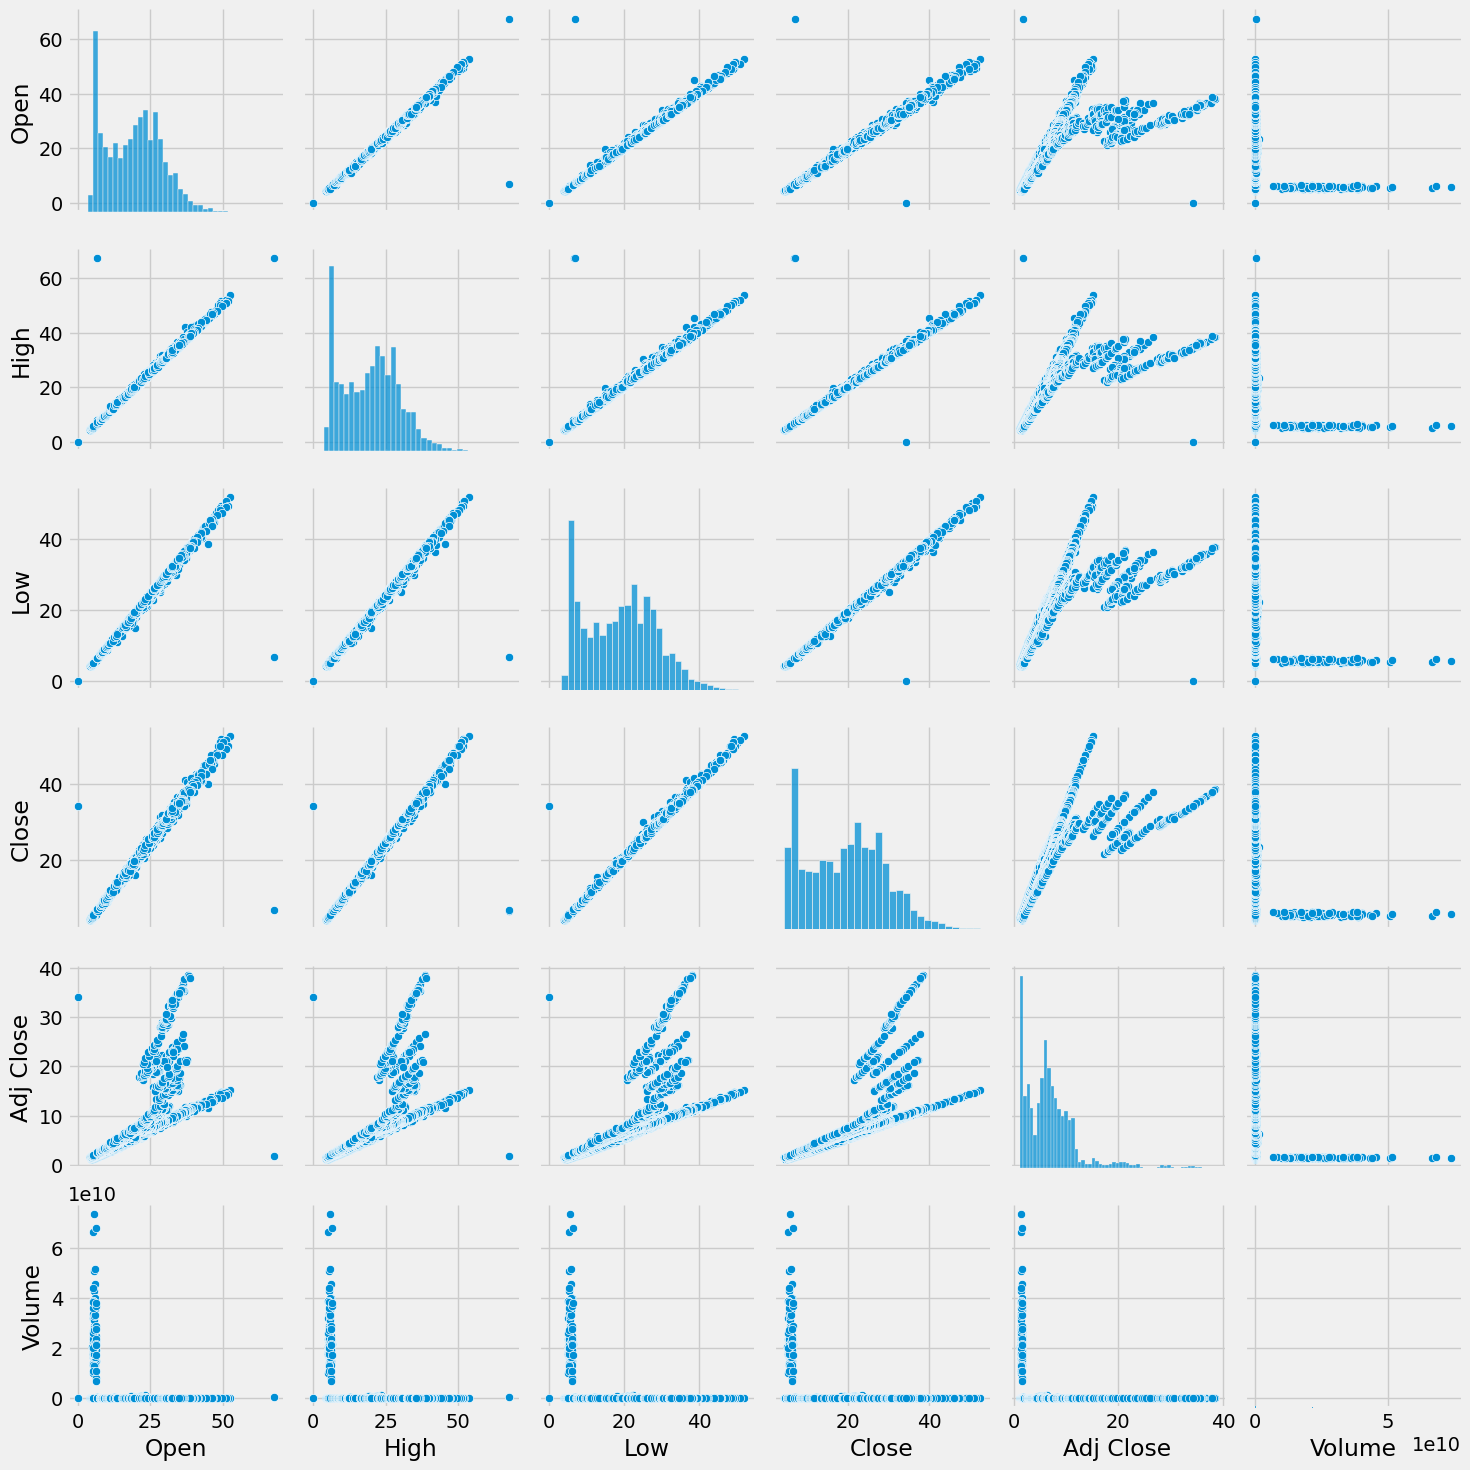

In [12]:
sns.pairplot(dados_do_ativo)

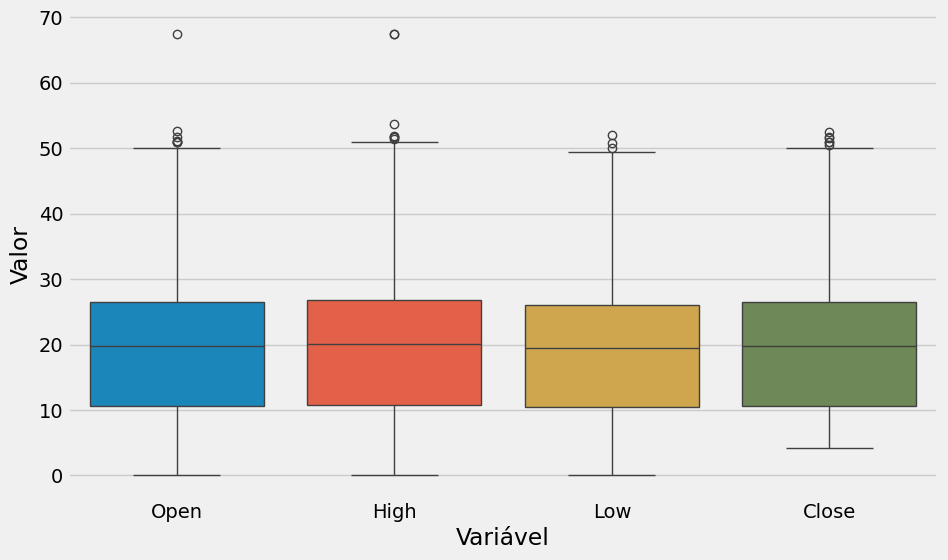

In [13]:
# Crie uma única área de plotagem
plt.figure(figsize=(10, 6))

# Crie um único box plot para todas as colunas
sns.boxplot(data=dados_do_ativo[['Open', 'High', 'Low', 'Close']])

# Adicione rótulos aos eixos, se desejar
plt.xlabel('Variável')
plt.ylabel('Valor')

# Exiba o gráfico
plt.show()

In [14]:
dados_do_ativo.shape

(5992, 6)

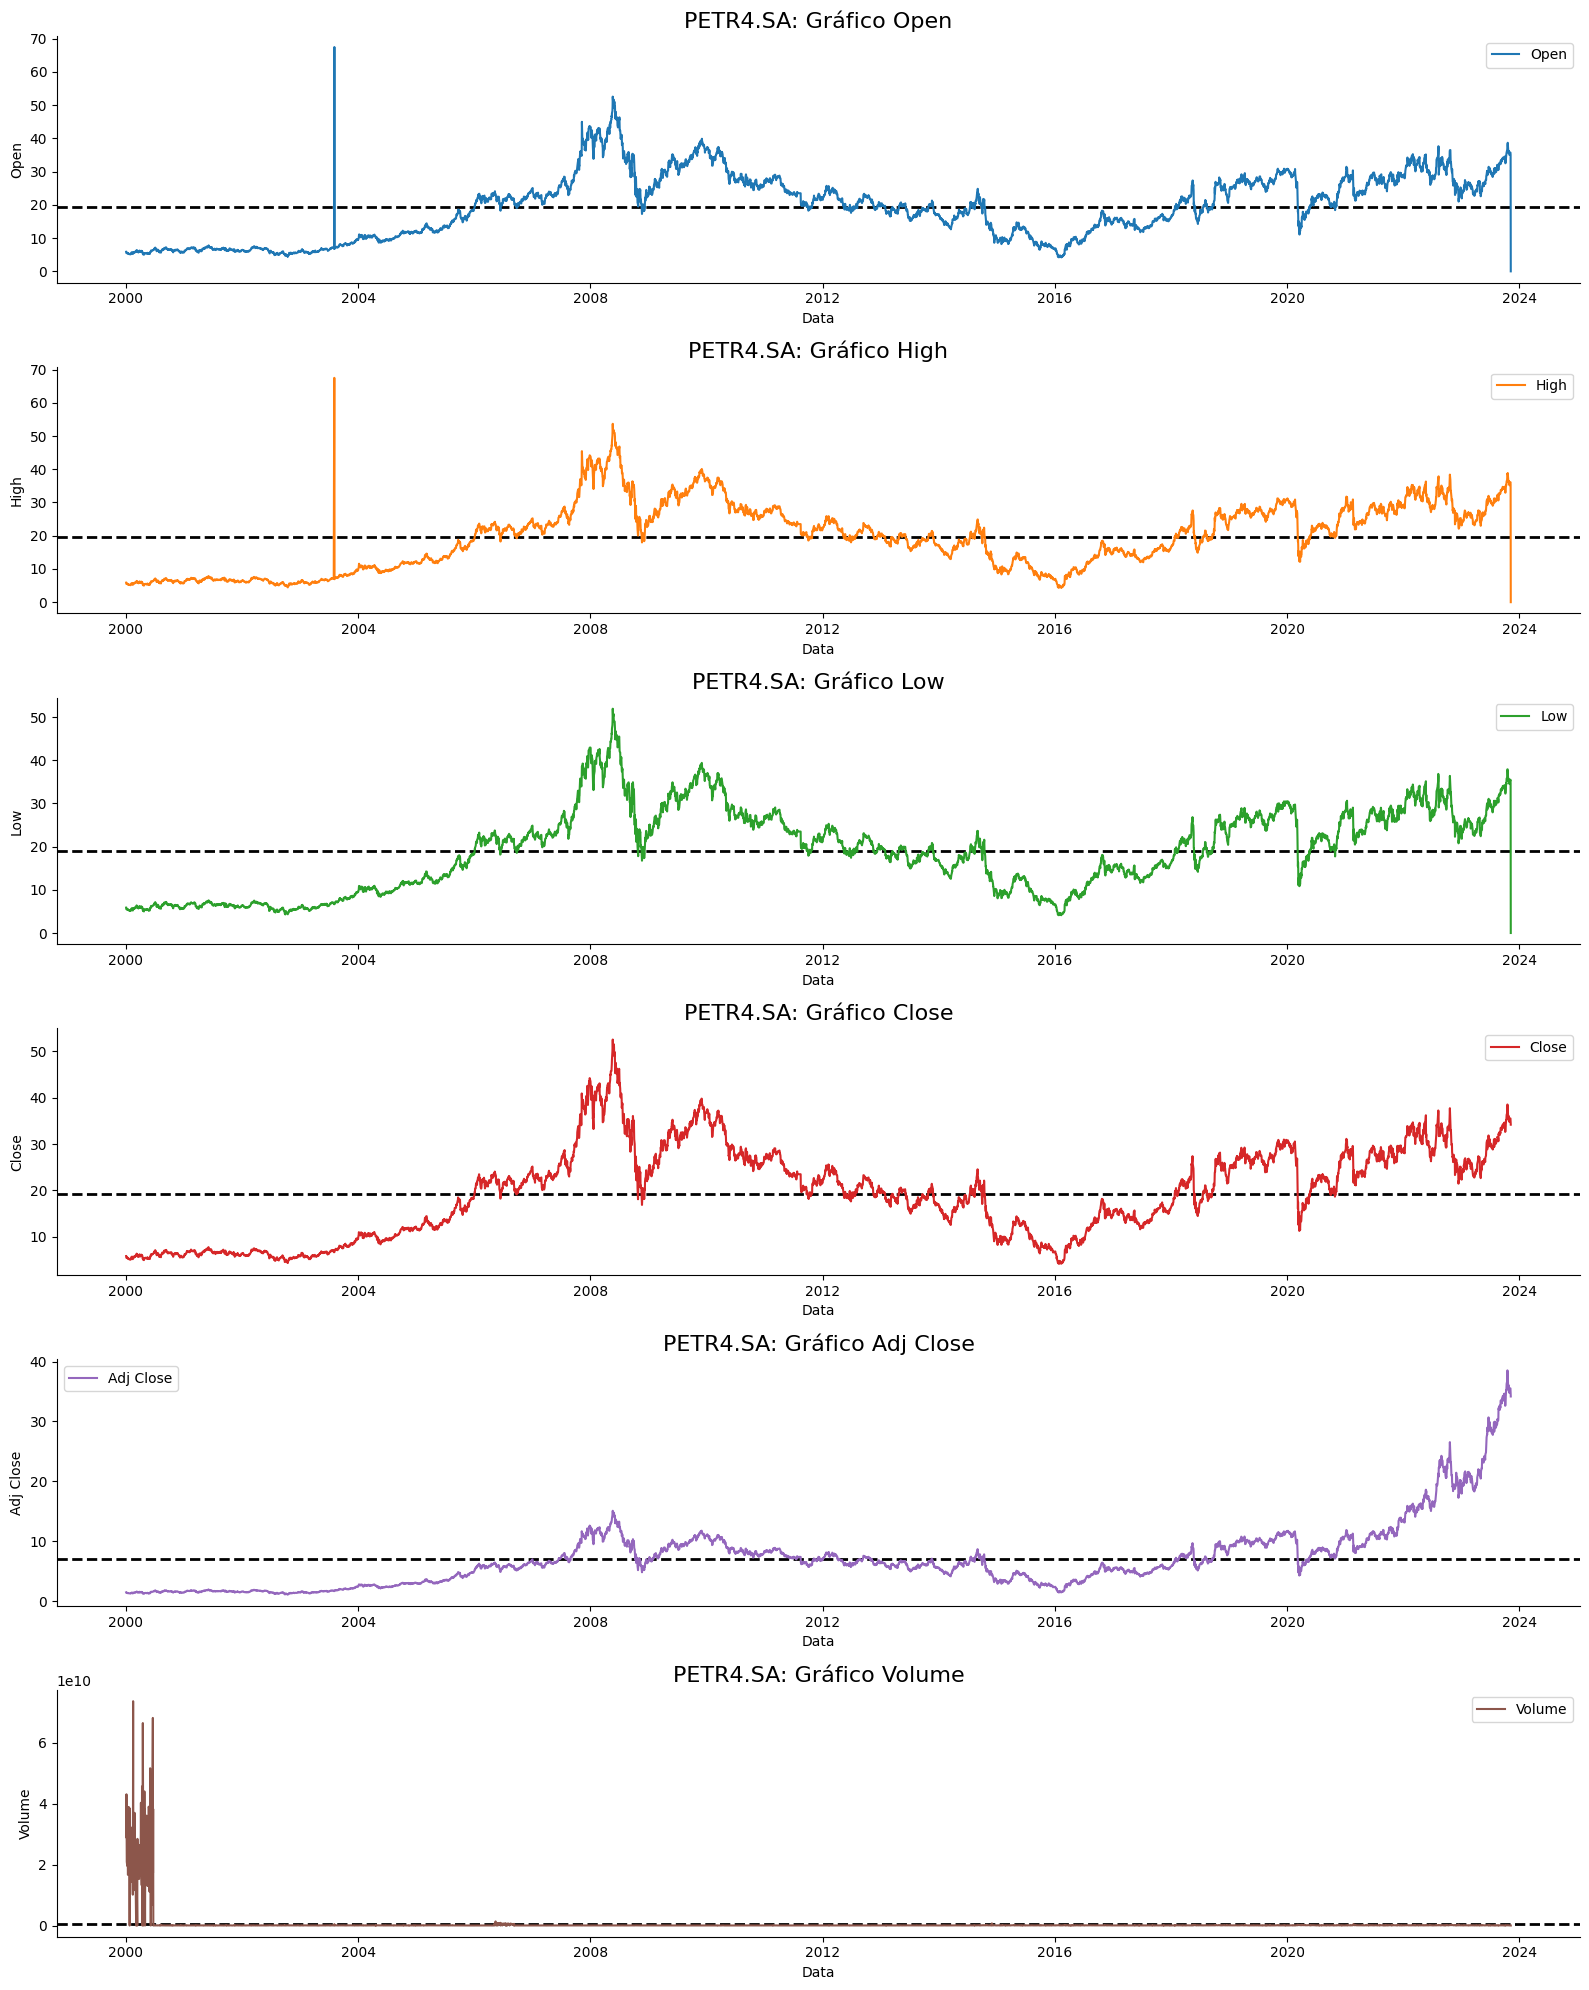

In [15]:
# This code plots columns in a dataframe.

# The number of rows, columns, and the subplot counter are initialized.
a = 6  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

plt.style.use('default')

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized
fig = plt.figure(figsize=(16,20))

for i in range(len(dados_do_ativo.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(dados_do_ativo[dados_do_ativo.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(dados_do_ativo[dados_do_ativo.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title(ativo + ': Gráfico ' + dados_do_ativo.columns[i], fontsize=16)
    plt.xlabel('Data')
    #Adding y axis label
    plt.ylabel(dados_do_ativo.columns[i])
    #Adding Legend
    plt.legend([dados_do_ativo.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

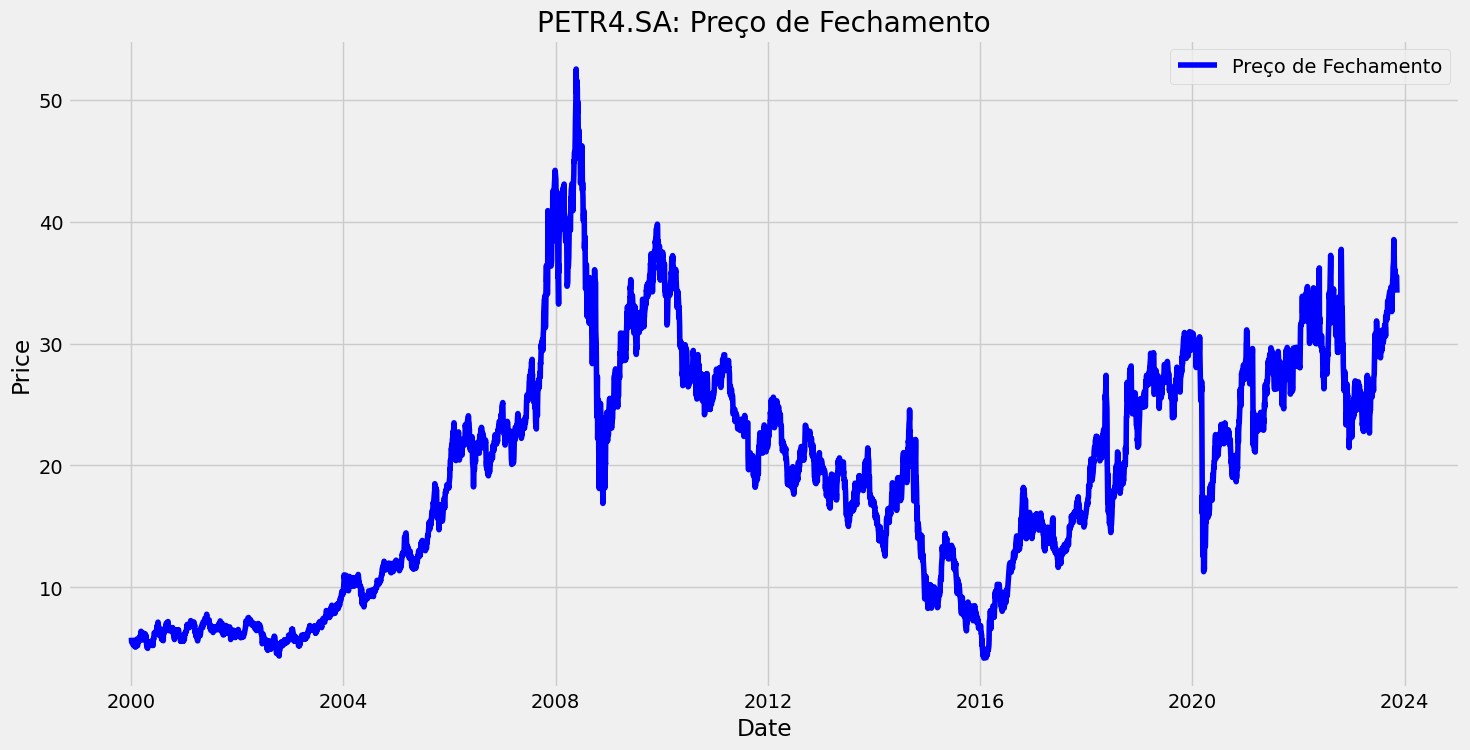

In [16]:
# Trend Analysis
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(dados_do_ativo['Close'], label = 'Preço de Fechamento', color='blue')
plt.title(ativo + ': Preço de Fechamento')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Cálculo de Retornos Diários
dados_do_ativo['Daily_Return'] = dados_do_ativo['Close'].pct_change()

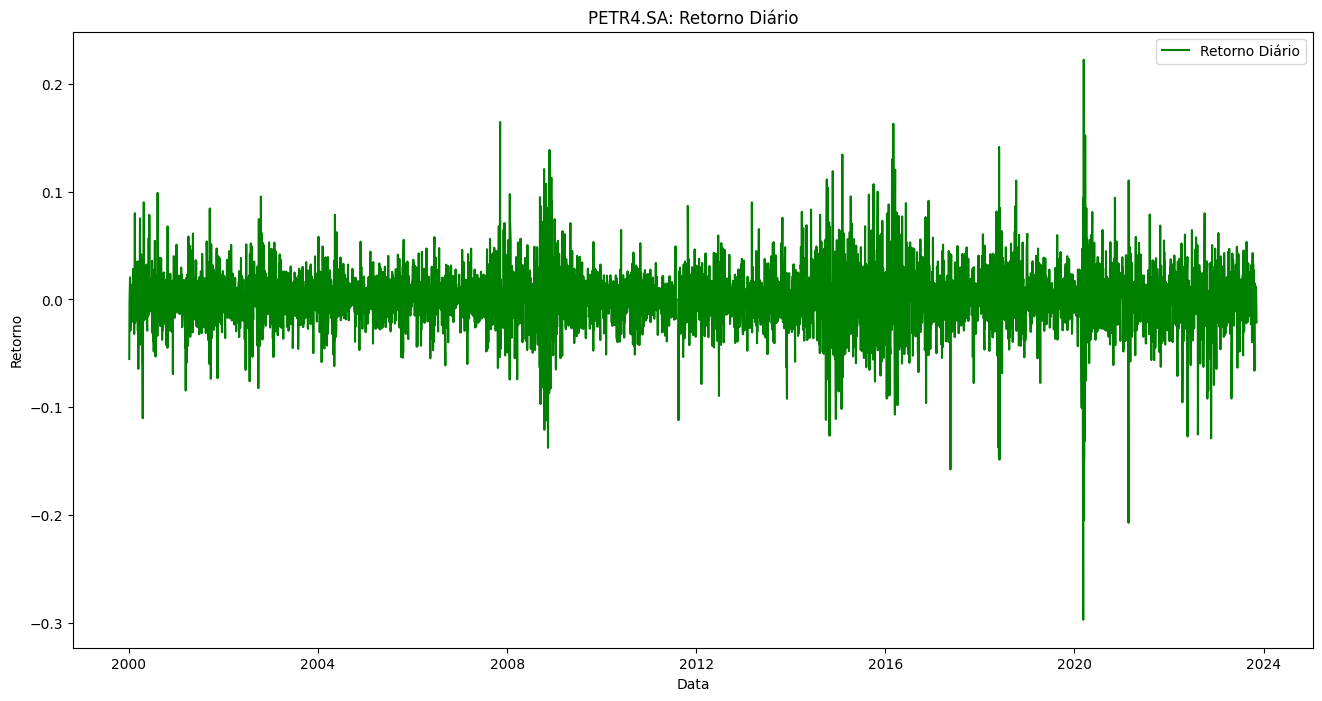

In [18]:
# Gráfico de Retornos Diários
plt.style.use('default')
plt.figure(figsize=(16, 8))
plt.plot(dados_do_ativo['Daily_Return'], label='Retorno Diário', color='green')
plt.title(ativo + ': Retorno Diário')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.show()

In [19]:
dados_do_ativo['SMA_50'] = dados_do_ativo['Close'].rolling(window=50).mean().round(2)
dados_do_ativo['SMA_200'] = dados_do_ativo['Close'].rolling(window=200).mean().round(2)

In [20]:
dados_do_ativo.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,SMA_50,SMA_200
Date,,,,,,,,,
2023-11-01,35.020000,35.540001,34.900002,35.119999,35.119999,46335300,0.010938,34.24,28.89
2023-11-03,35.790001,35.889999,35.049999,35.540001,35.540001,30959700,0.011959,34.34,28.94
2023-11-06,35.740002,36.130001,35.509998,35.509998,35.509998,33583600,-0.000844,34.40,28.99
2023-11-07,35.070000,35.419998,34.660000,34.919998,34.919998,48919900,-0.016615,34.46,29.04
2023-11-08,0.000000,0.000000,0.000000,34.169998,34.169998,0,-0.021478,34.50,29.08


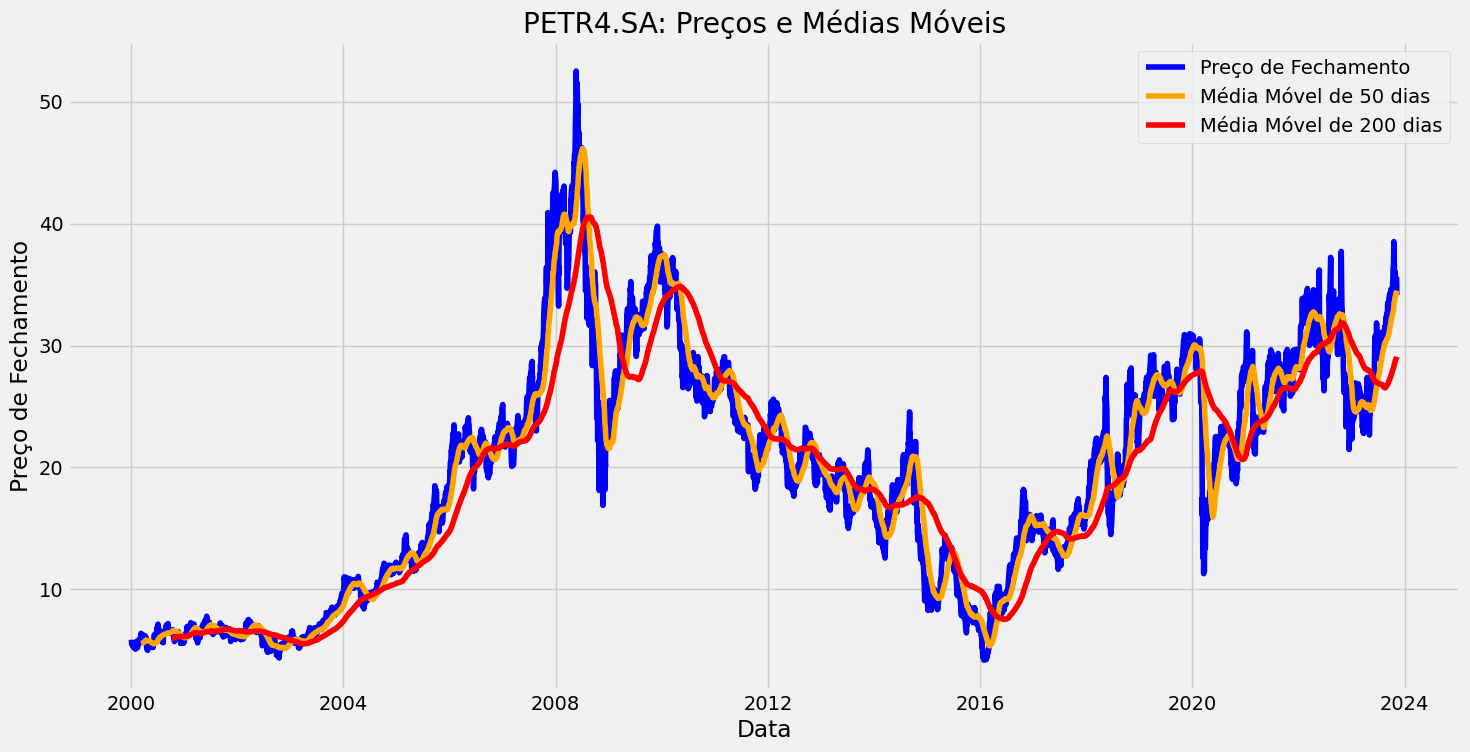

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))
plt.plot(dados_do_ativo['Close'], label='Preço de Fechamento', color='blue')
plt.plot(dados_do_ativo['SMA_50'], label='Média Móvel de 50 dias', color='orange')
plt.plot(dados_do_ativo['SMA_200'], label='Média Móvel de 200 dias', color='red')
plt.title(ativo + ': Preços e Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

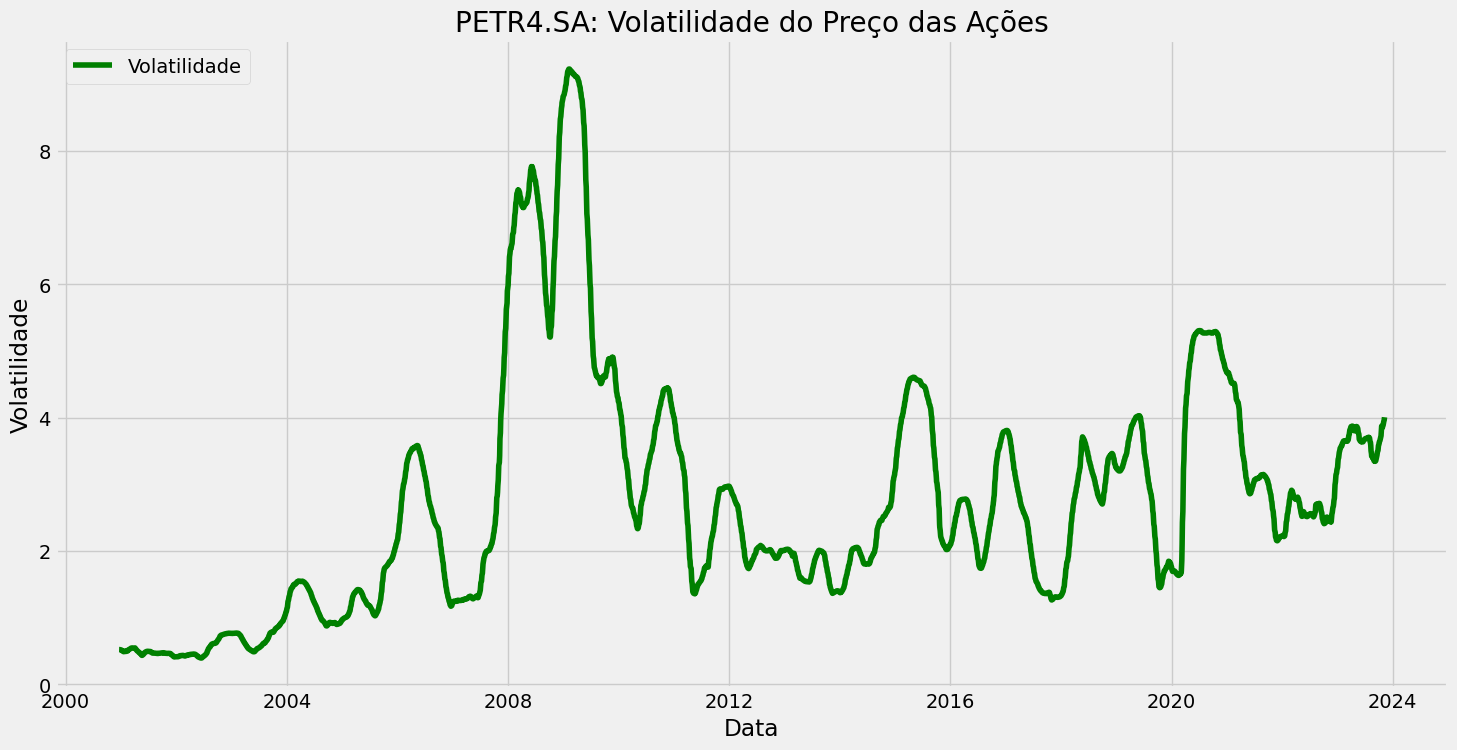

In [22]:
rolling_volatility = dados_do_ativo['Close'].rolling(window=252).std()  # 252 trading days in a year
plt.figure(figsize=(16, 8))
plt.plot(rolling_volatility, label='Volatilidade', color='green')
plt.title(ativo + ': Volatilidade do Preço das Ações')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend(loc='upper left')
plt.show()

In [23]:
preco_maximo_historico = dados_do_ativo['Close'].max()
preco_minimo_historico = dados_do_ativo['Close'].min()
print('Máximo Histórico : ', preco_maximo_historico)
print('Mínimo Histórico : ', preco_minimo_historico)

Máximo Histórico :  52.5099983215332
Mínimo Histórico :  4.199999809265137


In [24]:
# Filtrando apenas os dados de fechamento do ativo
cotacoes_df = dados_do_ativo.filter(['Close'])
cotacoes = cotacoes_df.values

In [25]:
# Normalizando os dados entre 0 e 1
normalizador = MinMaxScaler(feature_range=(0, 1))
cotacoes_normalizadas = normalizador.fit_transform(cotacoes)

In [26]:
cotacoes_normalizadas

array([[0.03467192],
       [0.02794453],
       [0.02678535],
       ...,
       [0.64810597],
       [0.63589318],
       [0.62036844]])

In [27]:
# Determinando o número de dias para treinamento (70% dos dados)
dias_treinamento = ceil(len(cotacoes) * 0.7)
cotacoes_treinamento = cotacoes_normalizadas[0:dias_treinamento]

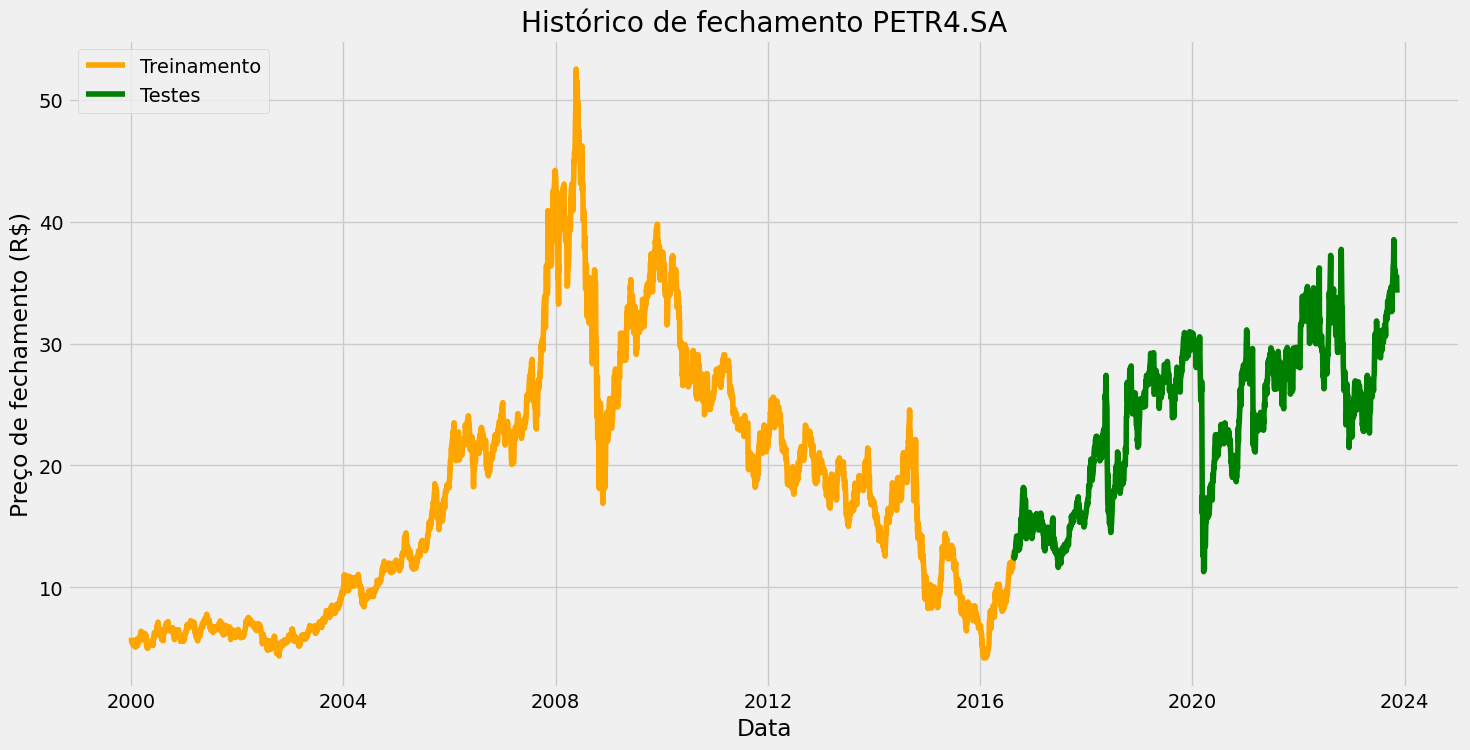

In [28]:
# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(16, 8))

# Definindo o título do gráfico
plt.title('Histórico de fechamento ' + ativo)

# Plotando a quantidade de dados de treino e teste
plt.plot(cotacoes_df[:dias_treinamento], color='Orange')
plt.plot(cotacoes_df[dias_treinamento:], color='Green')

# Configurando rótulos dos eixos
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (R$)')

# Definindo a legenda do gráfico
plt.legend(['Treinamento', 'Testes'], loc='upper left')

# Exibindo o gráfico
plt.show()

In [29]:
# Preparando dados para treinamento da rede neural
x_treino = []
y_treino = []

In [30]:
# Representa o tamanho da janela, ou seja,
# quantos pontos de dados anteriores são usados para prever o próximo ponto de dados
previsao_dias = 15

In [31]:
# Criando sequências de dados para x_treino e y_treino
for i in range(previsao_dias, len(cotacoes_treinamento)):
    x_treino.append(cotacoes_treinamento[i-previsao_dias:i])
    y_treino.append(cotacoes_treinamento[i])

# Convertendo listas em arrays numpy
x_treino, y_treino = np.array(x_treino), np.array(y_treino)

# Redimensionando o array de entrada para o modelo LSTM
x_treino = np.reshape(x_treino, (len(x_treino), previsao_dias, 1))

In [32]:
modelo_ia = Sequential()

# Adicionando camadas LSTM
modelo_ia.add(LSTM(units=50, return_sequences=True, input_shape=(x_treino.shape[1], 1)))
modelo_ia.add(Dropout(0.2))
modelo_ia.add(LSTM(units=50, return_sequences=False))
modelo_ia.add(Dropout(0.2))

# Adicionando camadas densas (fully connected)
modelo_ia.add(Dense(units=1))  # Previsão do próximo preço de fechamento

# Compilando o modelo
modelo_ia.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [33]:
# Treinando o modelo
modelo_ia.fit(x_treino, y_treino, batch_size=1024, epochs=100)

Epoch 1/100
5/5 [==============================] - 4s 71ms/step - loss: 0.0721 - mae: 0.2033 - mse: 0.0721
Epoch 2/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0115 - mae: 0.0878 - mse: 0.0115
Epoch 3/100
5/5 [==============================] - 0s 71ms/step - loss: 0.0150 - mae: 0.1116 - mse: 0.0150
Epoch 4/100
5/5 [==============================] - 0s 71ms/step - loss: 0.0059 - mae: 0.0592 - mse: 0.0059
Epoch 5/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0074 - mae: 0.0614 - mse: 0.0074
Epoch 6/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0036 - mae: 0.0431 - mse: 0.0036
Epoch 7/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0034 - mae: 0.0461 - mse: 0.0034
Epoch 8/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0025 - mae: 0.0356 - mse: 0.0025
Epoch 9/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0025 - mae: 0.0321 - mse: 0.0025
Epoch 10/100
5/5 [===================

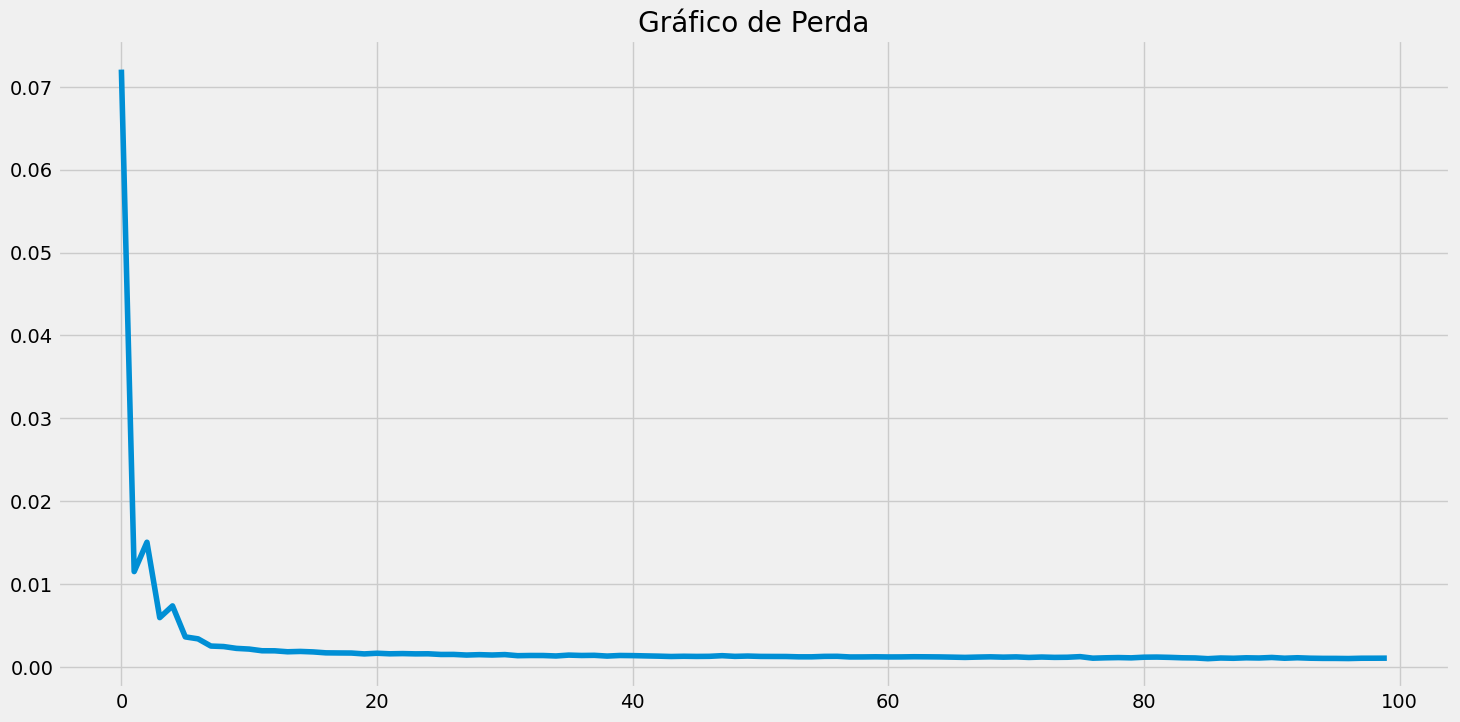

In [34]:
# Plotando a perda do modelo durante o treinamento
# Mostra que a perda caiu consideravelmente e o modelo treinou bem
plt.figure(figsize=(16, 8))
plt.title('Gráfico de Perda')
perda = modelo_ia.history.history['loss']
plt.plot(perda)

In [35]:
# Preparando dados de teste
cotacoes_teste = cotacoes_normalizadas[dias_treinamento - previsao_dias:]

x_teste = []
y_teste = cotacoes[dias_treinamento:]

# Criando sequências de dados para x_teste
for i in range(previsao_dias, len(cotacoes_teste)):
    x_teste.append(cotacoes_teste[i-previsao_dias : i])

# Convertendo x_teste em um array numpy e redimensionando
x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (len(x_teste), previsao_dias, 1))

In [36]:
# Fazendo previsões com o modelo e revertendo a normalização
previsoes = modelo_ia.predict(x_teste)
previsoes = normalizador.inverse_transform(previsoes)

57/57 [==============================] - 1s 3ms/step


In [37]:
# Calcular o MAE
mae = np.mean(np.abs(previsoes - y_teste))

# Calcular o MSE
mse = np.mean((previsoes - y_teste) ** 2)

# Calcular o RMSE
rmse = np.sqrt(mse)

# Exibir as métricas na tela
print('Erro Médio Absoluto (MAE):', mae)
print('Erro Médio Quadrático (MSE):', mse)
print('Raiz do Erro Médio Quadrático (RMSE):', rmse)

Erro Médio Absoluto (MAE): 1.057249751698659
Erro Médio Quadrático (MSE): 2.0510808152351103
Raiz do Erro Médio Quadrático (RMSE): 1.4321594936441648


In [38]:
# Separando dados de treinamento e validação
treino = cotacoes_df[:dias_treinamento]
valido = cotacoes_df[dias_treinamento:]

# Adicionando as previsões ao DataFrame de dados de validação
valido['Previsões'] = previsoes

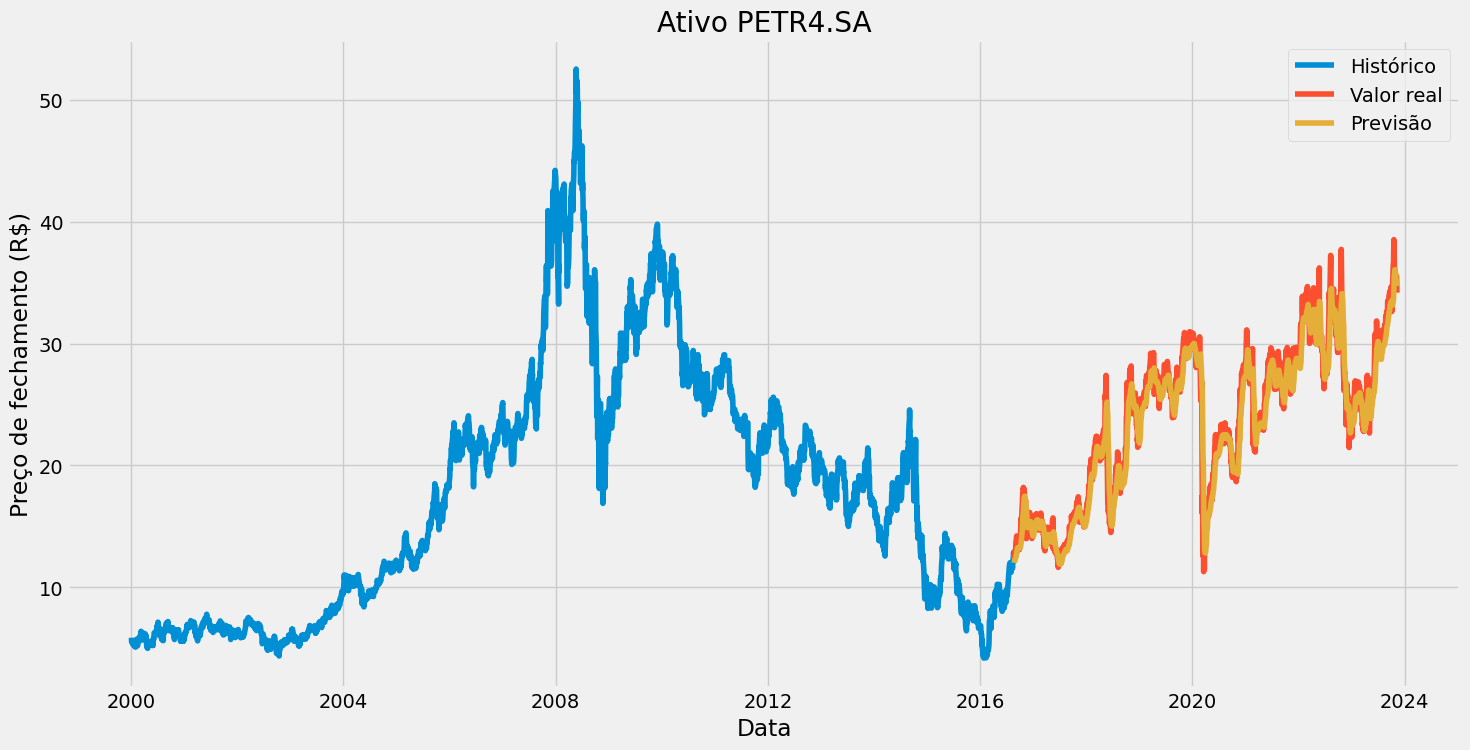

In [39]:
# Plotando os dados de treinamento, dados reais e previsões
plt.figure(figsize=(16, 8))
plt.title('Ativo ' + ativo)
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (R$)')
plt.plot(treino['Close'])
plt.plot(valido['Close'])
plt.plot(valido['Previsões'])
plt.legend(['Histórico', 'Valor real', 'Previsão'])
plt.show()

In [40]:
# Coletando os dados mais recentes para previsão (últimos 100 pontos)
dados_recentes = cotacoes_normalizadas[-previsao_dias:]

# Redimensionando os dados para o formato esperado pelo modelo LSTM
dados_recentes = np.array([dados_recentes])
dados_recentes = np.reshape(dados_recentes, (dados_recentes.shape[0], previsao_dias, 1))

# Fazendo a previsão para o próximo dia
previsao_proximo_dia = modelo_ia.predict(dados_recentes)

# Invertendo a normalização para obter o valor em reais
previsao_proximo_dia = normalizador.inverse_transform(previsao_proximo_dia)

# Exibindo a previsão para o próximo dia
print('Previsão de preço de fechamento para o próximo dia:', previsao_proximo_dia[0][0])

1/1 [==============================] - 0s 30ms/step
Previsão de preço de fechamento para o próximo dia: 34.553394
